# Challenge Kaggle - Visual In-Depth EDA – VinBigData Competition Data

    Neural network 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pydicom
import os
import glob
import pickle
import pandas as pd
import csv
from pathlib import Path
from IPython.display import HTML
from os import listdir, mkdir
import imageio
from IPython import display
from sklearn.metrics import roc_auc_score, roc_curve, auc
import scipy

import tensorflow as tf
from keras.models import load_model
from keras import layers 
from keras.layers import Concatenate,Input, Dense, Activation, ZeroPadding2D, \
BatchNormalization, Flatten, Conv2D 
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, \
GlobalAveragePooling2D 
from keras.models import Model, Sequential 
from keras.preprocessing import image 
from keras.utils import layer_utils 
from keras.utils.data_utils import get_file 
from keras.applications.imagenet_utils import preprocess_input 
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load data

In [3]:
Path = 'C:/Users/Felipe/Documents/DataSets/Final/Pulmonary-test.pckl'
f = open(Path, 'rb')
[Xt,Y] = pickle.load(f)

[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.]


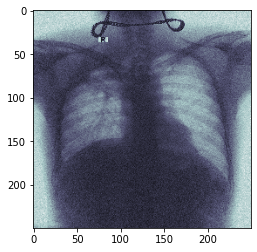

In [4]:
plt.imshow(Xt[0,:,:,1],cmap=plt.cm.bone)
print(Y[0])

# Construct the model

In [5]:
def KerasModel(input_shape):  
    NumClass = 15
    X_input  = Input(input_shape)
     
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(40, (3, 3), strides = (1, 1), name = 'conv0')(X)    
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    ##
    X = Conv2D(24, (3, 3), strides = (1, 1), name = 'conv1')(X)    
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)  
    ##
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dropout(0.5)(X)
    X = Dense(NumClass, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='KerasModel')
    
    return model 

In [6]:
# Construct the model
ModelPulm = KerasModel(Xt[0].shape) # input dimention
# Run the model
ModelPulm.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [7]:
ModelPulm.summary()

Model: "KerasModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 256, 256, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 254, 254, 40)      1120      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 254, 254, 40)      160       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 40)      0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 127, 127, 40)      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 125, 125, 24)      8

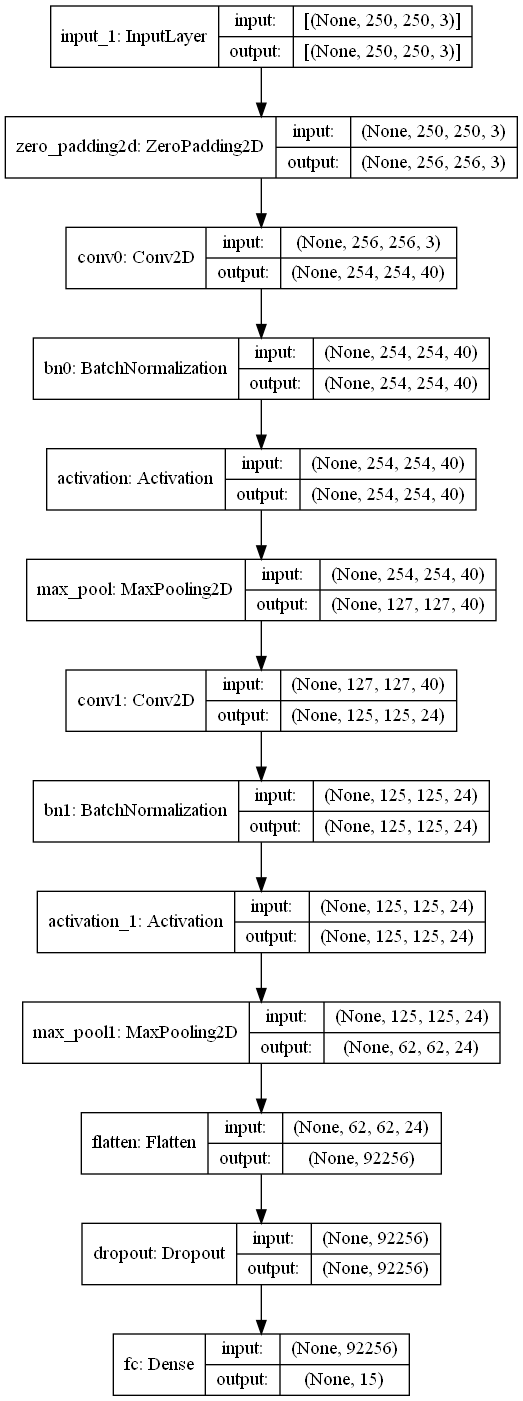

In [8]:
tf.keras.utils.plot_model(
    ModelPulm, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

# Load Model

In [2]:
# load model
ModelPulm = load_model('C:/Users/Felipe/Documents/DataSets/Pulm5/ModelPulm-5_6.h5') 

# Run the all model

Epoch 1/15
16/16 [==============================] - 131s 8s/step - loss: 0.2962 - accuracy: 0.3438 - val_loss: 0.2573 - val_accuracy: 0.3662
Epoch 2/15
16/16 [==============================] - 101s 6s/step - loss: 0.2155 - accuracy: 0.3574 - val_loss: 0.2305 - val_accuracy: 0.3887
Epoch 3/15
16/16 [==============================] - 101s 6s/step - loss: 0.1677 - accuracy: 0.3799 - val_loss: 0.2365 - val_accuracy: 0.3076
Epoch 4/15
16/16 [==============================] - 100s 6s/step - loss: 0.1477 - accuracy: 0.3789 - val_loss: 0.2348 - val_accuracy: 0.3252
Epoch 5/15
16/16 [==============================] - 100s 6s/step - loss: 0.1204 - accuracy: 0.3975 - val_loss: 0.2157 - val_accuracy: 0.3604
Epoch 6/15
16/16 [==============================] - 101s 6s/step - loss: 0.1107 - accuracy: 0.4170 - val_loss: 0.2281 - val_accuracy: 0.3174
Epoch 7/15
16/16 [==============================] - 102s 6s/step - loss: 0.1051 - accuracy: 0.3955 - val_loss: 0.2313 - val_accuracy: 0.3467
Epoch 8/15
16

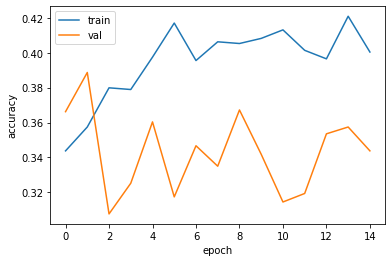

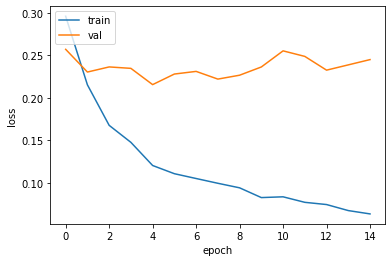

Epoch 1/15
16/16 [==============================] - 112s 7s/step - loss: 0.2799 - accuracy: 0.3594 - val_loss: 0.2700 - val_accuracy: 0.3145
Epoch 2/15
16/16 [==============================] - 102s 6s/step - loss: 0.1967 - accuracy: 0.3711 - val_loss: 0.2598 - val_accuracy: 0.3818
Epoch 3/15
16/16 [==============================] - 100s 6s/step - loss: 0.1462 - accuracy: 0.3936 - val_loss: 0.2224 - val_accuracy: 0.3330
Epoch 4/15
16/16 [==============================] - 100s 6s/step - loss: 0.1132 - accuracy: 0.4102 - val_loss: 0.2196 - val_accuracy: 0.3506
Epoch 5/15
16/16 [==============================] - 100s 6s/step - loss: 0.1010 - accuracy: 0.4277 - val_loss: 0.2121 - val_accuracy: 0.3252
Epoch 6/15
16/16 [==============================] - 100s 6s/step - loss: 0.0889 - accuracy: 0.4170 - val_loss: 0.2012 - val_accuracy: 0.3604
Epoch 7/15
16/16 [==============================] - 99s 6s/step - loss: 0.0805 - accuracy: 0.4141 - val_loss: 0.2193 - val_accuracy: 0.3340
Epoch 8/15
16/

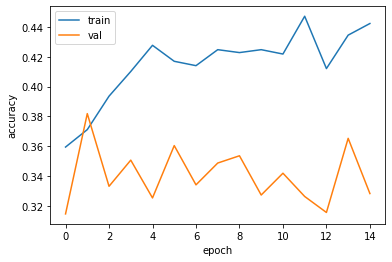

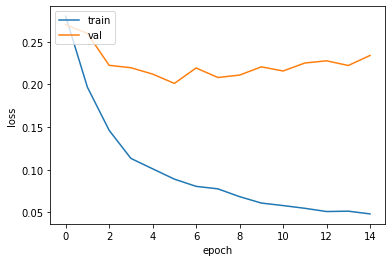

Epoch 1/15
16/16 [==============================] - 106s 7s/step - loss: 0.2635 - accuracy: 0.3398 - val_loss: 0.2252 - val_accuracy: 0.3623
Epoch 2/15
16/16 [==============================] - 100s 6s/step - loss: 0.1909 - accuracy: 0.3711 - val_loss: 0.2105 - val_accuracy: 0.3389
Epoch 3/15
16/16 [==============================] - 101s 6s/step - loss: 0.1562 - accuracy: 0.4092 - val_loss: 0.2100 - val_accuracy: 0.3262
Epoch 4/15
16/16 [==============================] - 101s 6s/step - loss: 0.1180 - accuracy: 0.4141 - val_loss: 0.2091 - val_accuracy: 0.3477
Epoch 5/15
16/16 [==============================] - 101s 6s/step - loss: 0.1101 - accuracy: 0.4111 - val_loss: 0.2037 - val_accuracy: 0.3457
Epoch 6/15
16/16 [==============================] - 100s 6s/step - loss: 0.0948 - accuracy: 0.4199 - val_loss: 0.2072 - val_accuracy: 0.3770
Epoch 7/15
16/16 [==============================] - 101s 6s/step - loss: 0.0825 - accuracy: 0.4160 - val_loss: 0.2031 - val_accuracy: 0.4170
Epoch 8/15
16

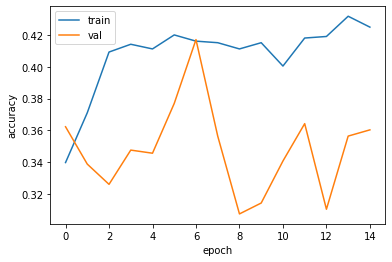

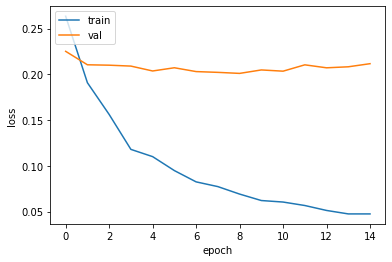

In [3]:
for i in range(7,10):
    save_history = 'C:/Users/Felipe/Documents/DataSets/Pulm5/history-5_' + str(i) + '.png'
    save_loss    = 'C:/Users/Felipe/Documents/DataSets/Pulm5/loss-5_' + str(i) + '.png'
    save_model   = 'C:/Users/Felipe/Documents/DataSets/Pulm5/ModelPulm-5_' + str(i) + '.h5'
    Path         = 'C:/Users/Felipe/Documents/DataSets/Pulmonary/Data_pulmonary' + str(i) + '.pckl'
    f = open(Path, 'rb')
    [Xt,Y] = pickle.load(f)
    
    Validacao    = 'C:/Users/Felipe/Documents/DataSets/Pulmonary/Data_pulmonary_val.pckl'
    fv = open(Validacao, 'rb')
    [Xv,Yv] = pickle.load(fv)    
    
    # save fit model
    history = ModelPulm.fit(x = Xt, y = Y, batch_size = 2**6, epochs = 16, validation_data = (Xv,Yv)) 
    
    #save model
    ModelPulm.save(save_model)
    
    # save validation fit model
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(save_history, format='png')
    plt.show()
   
    # save validation loss model
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig(save_loss, format='png')
    plt.show()   

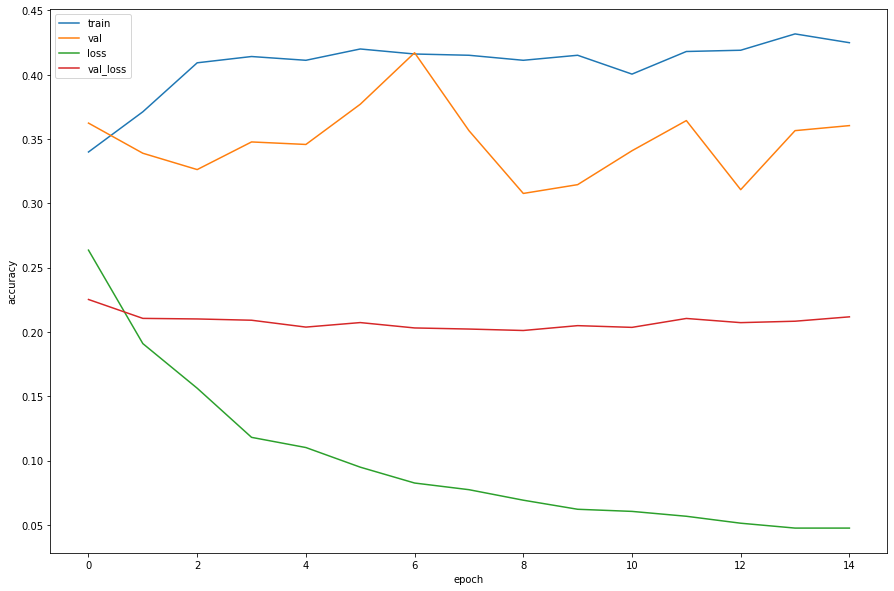

In [4]:
plt.figure(figsize = (15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val', 'loss', 'val_loss'], loc='upper left')
plt.savefig('C:/Users/Felipe/Documents/DataSets/Pulm5/train9.png', format='png')
plt.show()